In [1]:
import pandas as pd
pd.pandas.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [3]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
df.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [5]:
df['HomePlanet'].fillna(df['HomePlanet'].mode()[0], inplace=True)
df_test['HomePlanet'].fillna(df['HomePlanet'].mode()[0], inplace=True)

In [6]:
df = pd.get_dummies(df, columns = ["HomePlanet"])
df_test = pd.get_dummies(df_test, columns = ["HomePlanet"])

In [7]:
df.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [8]:
df['CryoSleep'].fillna(df['CryoSleep'].mode()[0], inplace=True)
df_test['CryoSleep'].fillna(df['CryoSleep'].mode()[0], inplace=True)

In [9]:
df['CryoSleep'] = df['CryoSleep'].replace({False: 0, True: 1})
df_test['CryoSleep'] = df_test['CryoSleep'].replace({False: 0, True: 1})
df['CryoSleep'] = df['CryoSleep'].astype(int)
df_test['CryoSleep'] = df_test['CryoSleep'].astype(int)

In [10]:
df.isnull().sum()

PassengerId            0
CryoSleep              0
Cabin                199
Destination          182
Age                  179
VIP                  203
RoomService          181
FoodCourt            183
ShoppingMall         208
Spa                  183
VRDeck               188
Name                 200
Transported            0
HomePlanet_Earth       0
HomePlanet_Europa      0
HomePlanet_Mars        0
dtype: int64

In [11]:
df.Cabin.nunique()

6560

In [12]:
df.Cabin.sample(5)

1050    G/174/S
1719     D/56/P
3543    F/783/P
5573    G/962/P
1227     E/82/P
Name: Cabin, dtype: object

In [13]:
for i, row in df.iterrows():
    if type(row['Cabin']) == str:
        # Cabin_num
        cabin_num = row['Cabin'].split('/')[1]
        df.at[i, 'Cabin_num'] = cabin_num
        
        # Cabin_deck
        cabin_deck = row['Cabin'][0]
        df.at[i, 'Cabin_deck'] = cabin_deck
        
        # Cabin_side
        cabin_side = row['Cabin'][-1]
        df.at[i, 'Cabin_side'] = cabin_side
    else:
        df.at[i, 'Cabin_num'] = None
        df.at[i, 'Cabin_deck'] = None
        df.at[i, 'Cabin_side'] = None
        
        
for i, row in df_test.iterrows():
    if type(row['Cabin']) == str:
        # Cabin_num
        cabin_num = row['Cabin'].split('/')[1]
        df_test.at[i, 'Cabin_num'] = cabin_num
        
        # Cabin_deck
        cabin_deck = row['Cabin'][0]
        df_test.at[i, 'Cabin_deck'] = cabin_deck
        
        # Cabin_side
        cabin_side = row['Cabin'][-1]
        df_test.at[i, 'Cabin_side'] = cabin_side
    else:
        df_test.at[i, 'Cabin_num'] = None
        df_test.at[i, 'Cabin_deck'] = None
        df_test.at[i, 'Cabin_side'] = None

In [14]:
df.drop(columns=["Cabin"], inplace=True)
df_test.drop(columns=["Cabin"], inplace=True)

In [15]:
import seaborn as sns

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Cabin_num', ylabel='Density'>

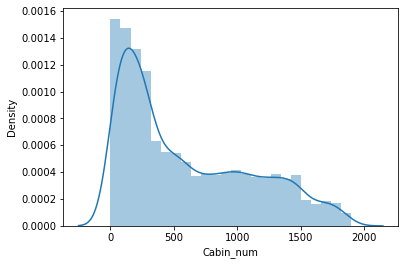

In [16]:
sns.distplot(df.Cabin_num)

In [17]:
df.Cabin_num.nunique()

1817

In [18]:
df.drop(columns='Cabin_num', inplace=True)
df_test.drop(columns='Cabin_num', inplace=True)

In [19]:
import numpy as np
# Sütundaki null değerleri say
null_count = df['Cabin_deck'].isnull().sum()

# En çok tekrar eden ilk ve ikinci değerleri belirle
most_common_values = df['Cabin_deck'].value_counts().index[:2].tolist()

# Null değerlerin yarısını en çok tekrar eden ilk değerle, diğer yarısını ise en çok tekrar eden ikinci değerle doldur
df['Cabin_deck'].fillna({i: np.random.choice(most_common_values, p=[0.5, 0.5]) for i in df.index[df['Cabin_deck'].isnull()].tolist()[:null_count//2] + 
                        df.index[df['Cabin_deck'].isnull()].tolist()[null_count//2:]}, inplace=True)

In [20]:
# Sütundaki null değerleri say
null_count = df_test['Cabin_deck'].isnull().sum()

# En çok tekrar eden ilk ve ikinci değerleri belirle
most_common_values = df_test['Cabin_deck'].value_counts().index[:2].tolist()

# Null değerlerin yarısını en çok tekrar eden ilk değerle, diğer yarısını ise en çok tekrar eden ikinci değerle doldur
df_test['Cabin_deck'].fillna({i: np.random.choice(most_common_values, p=[0.5, 0.5]) for i in df_test.index[df_test['Cabin_deck'].isnull()].tolist()[
    :null_count//2] + df_test.index[df_test['Cabin_deck'].isnull()].tolist()[null_count//2:]}, inplace=True)

In [21]:
df.isnull().sum()

PassengerId            0
CryoSleep              0
Destination          182
Age                  179
VIP                  203
RoomService          181
FoodCourt            183
ShoppingMall         208
Spa                  183
VRDeck               188
Name                 200
Transported            0
HomePlanet_Earth       0
HomePlanet_Europa      0
HomePlanet_Mars        0
Cabin_deck             0
Cabin_side           199
dtype: int64

In [22]:
df.Cabin_deck.value_counts()

F    2899
G    2653
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin_deck, dtype: int64

In [23]:
mapping_cabin_d = {'A': 1, 'B': 2, 'C': 2,'D': 2, 'E': 3, 'F': 4,'G':5,'T':6}

# replace() metodunu kullanarak değişikliği uyguluyoruz
df['Cabin_deck'] = df['Cabin_deck'].replace(mapping_cabin_d)
df_test['Cabin_deck'] = df_test['Cabin_deck'].replace(mapping_cabin_d)

df_test['Cabin_deck'] = df_test['Cabin_deck'].astype(int)
df['Cabin_deck'] = df['Cabin_deck'].astype(int)

In [25]:
df.Cabin_side.value_counts()

S    4288
P    4206
Name: Cabin_side, dtype: int64

In [26]:
# Sütundaki null değerleri say
null_count = df['Cabin_side'].isnull().sum()

# En çok tekrar eden ilk ve ikinci değerleri belirle
most_common_values = df['Cabin_side'].value_counts().index[:2].tolist()

# Null değerlerin yarısını en çok tekrar eden ilk değerle, diğer yarısını ise en çok tekrar eden ikinci değerle doldur
df['Cabin_side'].fillna({i: np.random.choice(most_common_values, p=[0.5, 0.5]) for i in df.index[df['Cabin_side'].isnull()].tolist()[:null_count//2] + 
                        df.index[df['Cabin_side'].isnull()].tolist()[null_count//2:]}, inplace=True)

In [27]:
null_count = df_test['Cabin_side'].isnull().sum()

# En çok tekrar eden ilk ve ikinci değerleri belirle
most_common_values = df_test['Cabin_side'].value_counts().index[:2].tolist()

# Null değerlerin yarısını en çok tekrar eden ilk değerle, diğer yarısını ise en çok tekrar eden ikinci değerle doldur
df_test['Cabin_side'].fillna({i: np.random.choice(most_common_values, p=[0.5, 0.5]) for i in df_test.index[df_test['Cabin_side'].isnull()].tolist()[
    :null_count//2] + df_test.index[df_test['Cabin_side'].isnull()].tolist()[null_count//2:]}, inplace=True)

In [28]:
df.Cabin_side.value_counts()

S    4396
P    4297
Name: Cabin_side, dtype: int64

In [29]:
'''
S:1
P:0
'''

df['Cabin_side'] = df['Cabin_side'].replace({'S': 1, 'P': 0})
df_test['Cabin_side'] = df_test['Cabin_side'].replace({'S': 1, 'P': 0})
df['Cabin_side'] = df['Cabin_side'].astype(int)
df_test['Cabin_side'] = df_test['Cabin_side'].astype(int)

In [30]:
df

,PassengerId,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Cabin_deck,Cabin_side
0,0001_01,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0,2,0
1,0002_01,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,4,1
2,0003_01,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0,1,1
3,0003_02,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0,1,1
4,0004_01,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,1,0,1,0
8689,9278_01,1,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,1,0,0,5,1
8690,9279_01,0,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1,0,0,5,1
8691,9280_01,0,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,0,1,0,3,1
